In [1]:
import numpy as np
import sympy as sp
import scipy.sparse as sparse
import matplotlib.pyplot as plt
from matplotlib import cm

x, y, t = sp.symbols('x,y,t')
from ..Wave2D import Wave2D, Wave2D_Neumann

ModuleNotFoundError: No module named 'Wave2D'

### Question 1 

For the exact solution 
$$
\begin{equation}
u(t,x,y) = e^{\imath (k_x x + k_y y - \omega t)}
\end{equation}
$$
differentiating shows that $\partial_t^2 u = -\omega^2 u$ and that $\Delta u = -(k_x^2 + k_y^2) u$. Thus $u$ solves the wave equation  $\partial_t^2 u = c^2\Delta u$ if and only if $\omega = c\sqrt{k_x^2 + k_y^2} $.

### Make animation

Solving for t in [0, 0.6010407640085654] with (N, Nt) = (30, 51).


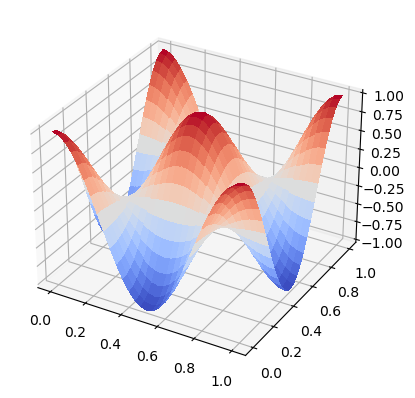

In [ ]:
solver = Wave2D_Neumann(cfl=2**(-.5), c=2, mx=2, my=2)
xij, yij, data = solver(N=30, Nt=51, store_data=5)
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xij, yij, data[0], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [ ]:
%%capture 
# capture, otherwise there will be a plot in this cell
import matplotlib.animation as animation

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
frames = []
for n, val in data.items():
    frame = ax.plot_wireframe(xij, yij, val, rstride=2, cstride=2);
    #frame = ax.plot_surface(xij, yij, val, vmin=-0.5*data[0].max(), 
    #                        vmax=data[0].max(), cmap=cm.coolwarm,
    #                        linewidth=0, antialiased=False)
    frames.append([frame])
    
ani = animation.ArtistAnimation(fig, frames, interval=400, blit=True,
                                repeat_delay=1000)
ani.save('wavemovie2d.apng', writer='pillow', fps=5) # This animated png opens in a browser

In [ ]:
from IPython.display import HTML
from IPython.display import display
display(HTML(ani.to_jshtml()))